In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('./german_credit_data.csv')

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [8]:
df.shape

(1000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['Job'].unique()

array([2, 1, 3, 0])

In [12]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [16]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [17]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [18]:
df.drop(columns='Unnamed: 0', inplace=True)

In [19]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

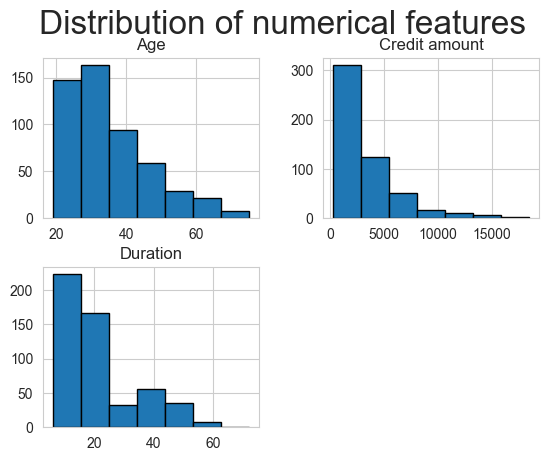

In [20]:
df[['Age','Credit amount','Duration']].hist(bins=7, edgecolor= 'black')
plt.suptitle('Distribution of numerical features', fontsize = 24)
plt.show()

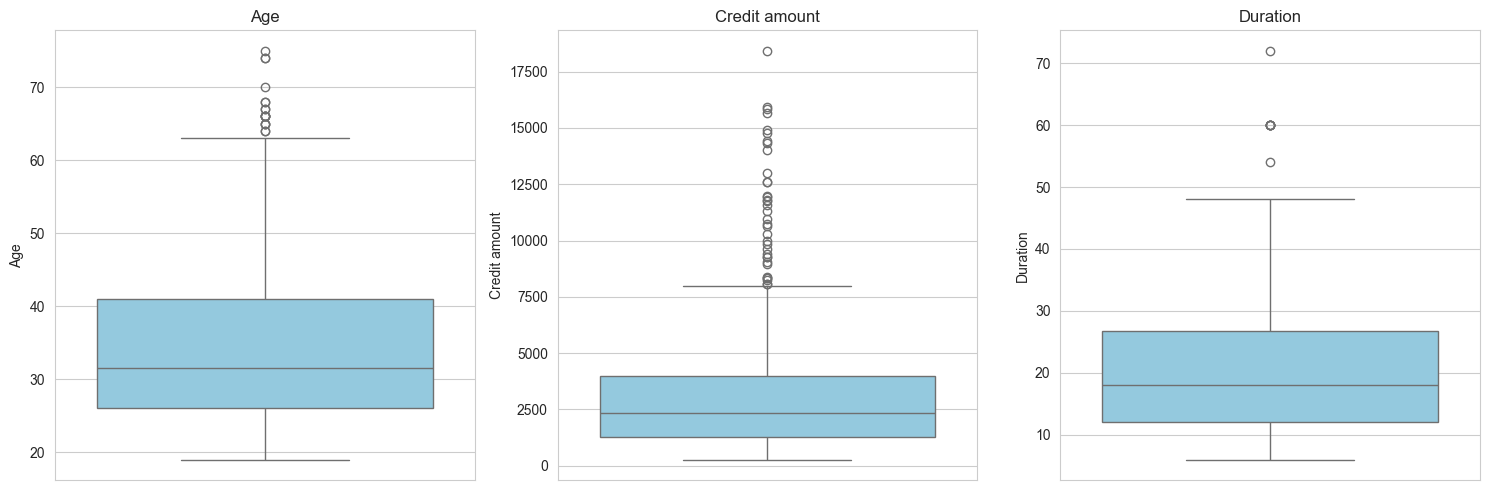

In [21]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    
plt.tight_layout()
plt.show()

#Create multiple boxplots in a single figure for quick comparison of numeric features.

In [22]:

df.query('Duration >= 60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [23]:
categorial_cols = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

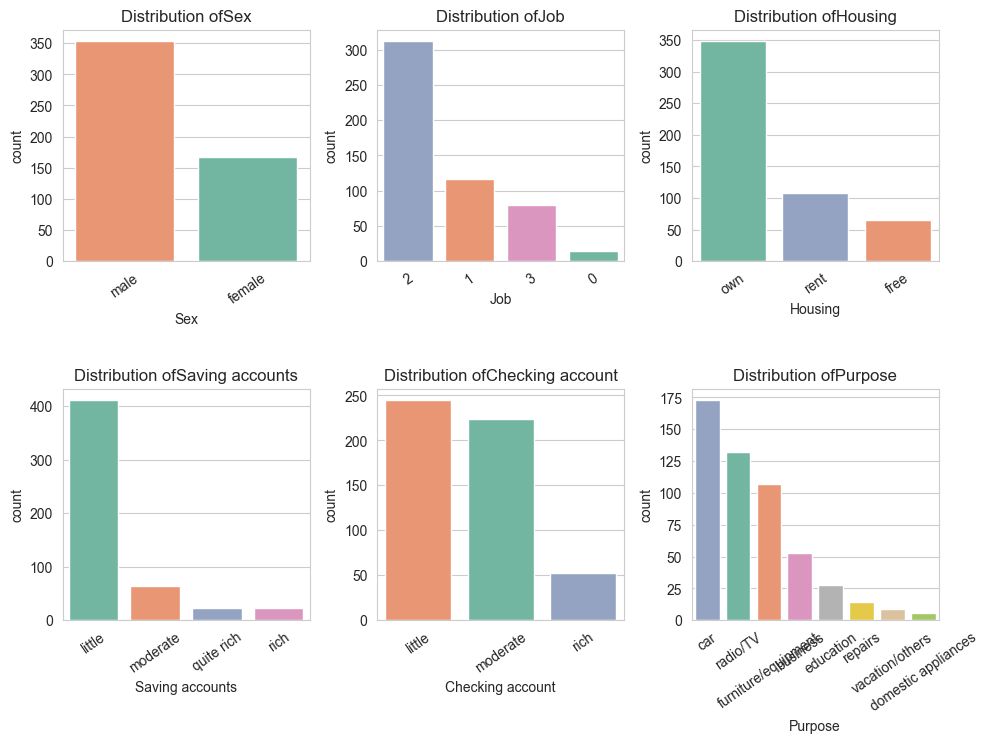

In [24]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorial_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index, hue=col, legend=False)
    plt.title(f"Distribution of{col}")
    plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

# This code creates multiple bar charts (countplots) in a grid layout to visualize how categorical variables are distributed in the dataset.

In [25]:
corr = df[['Age','Job','Credit amount','Duration']].corr()

In [26]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

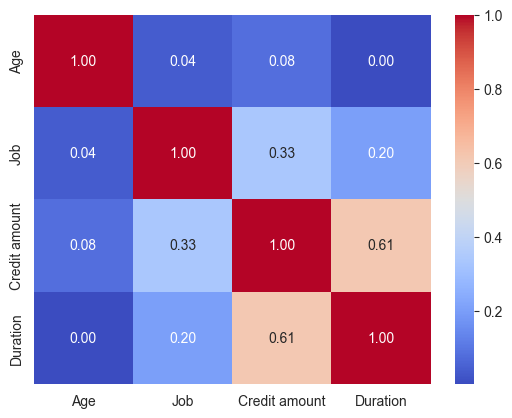

In [27]:
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt ='.2f')

In [28]:
df.groupby('Job')['Credit amount'].mean() #Do certain job types borrow more money on average?

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [29]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [30]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [31]:
df['Purpose'].value_counts()

Purpose
car                    173
radio/TV               132
furniture/equipment    107
business                53
education               28
repairs                 14
vacation/others          9
domestic appliances      6
Name: count, dtype: int64

In [32]:
pd.pivot_table(df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


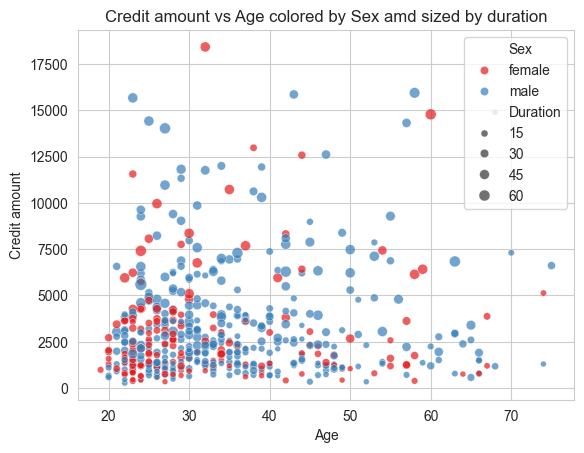

In [33]:
sns.scatterplot(data=df, x='Age',y='Credit amount', hue='Sex', size='Duration',alpha=0.7,palette='Set1')
plt.title('Credit amount vs Age colored by Sex amd sized by duration')
plt.show()

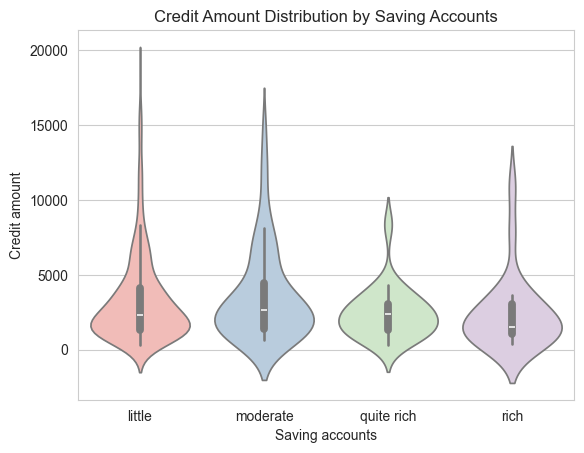

In [34]:
sns.violinplot(data=df,x='Saving accounts', y='Credit amount',hue='Saving accounts', palette = 'Pastel1',legend=False)
plt.title('Credit Amount Distribution by Saving Accounts')
plt.show()

In [35]:
df['Risk'].value_counts(normalize=True) *100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

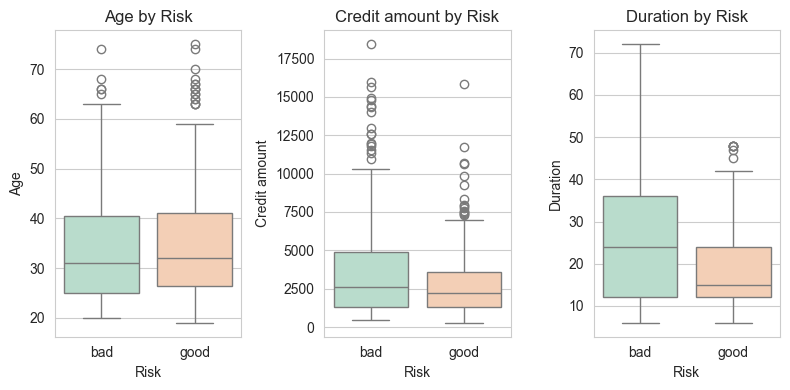

In [36]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age",'Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='Risk',y=col, palette="Pastel2", hue='Risk',legend=False)
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [37]:
df.groupby('Risk')[['Age','Credit amount','Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [38]:
categorial_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

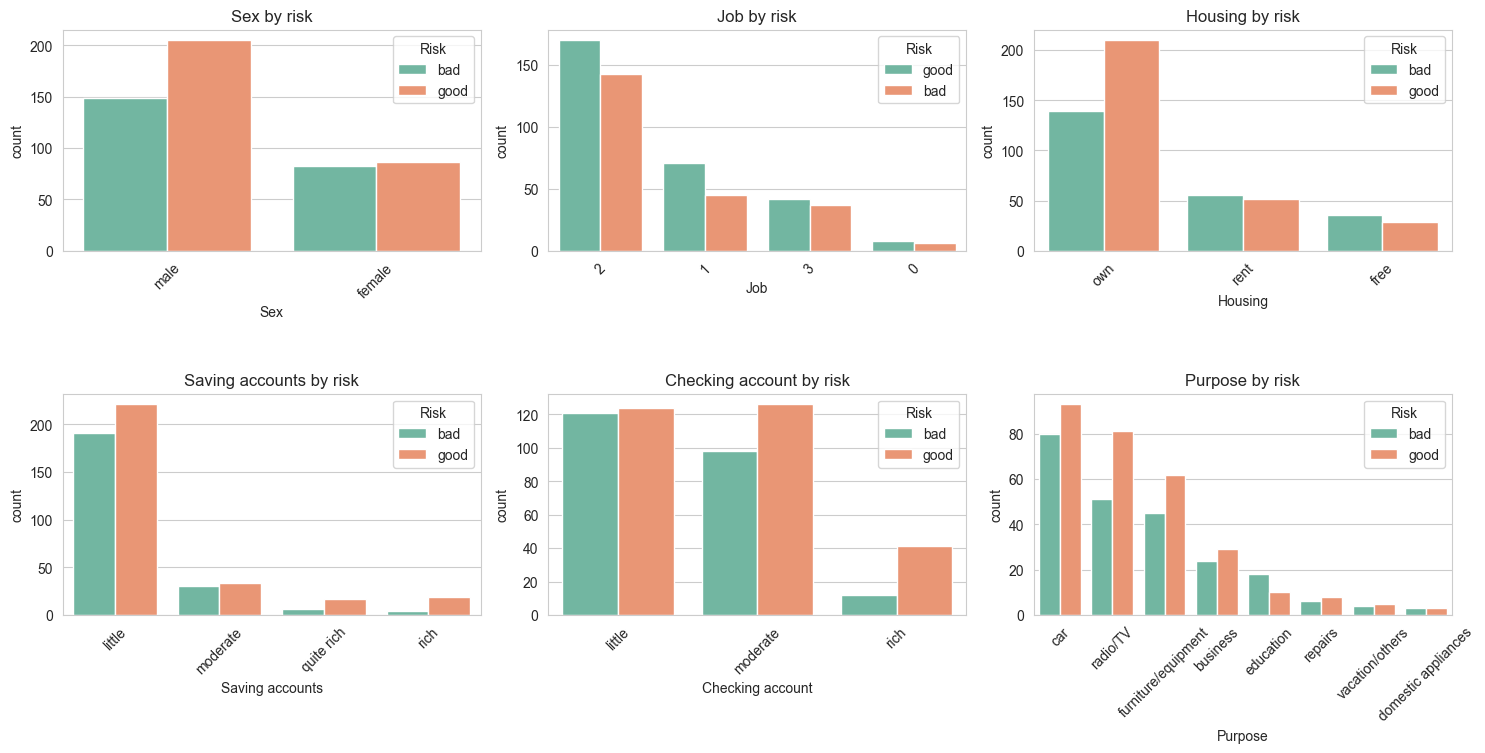

In [39]:
plt.figure(figsize=(15,10))
for i,col in enumerate(categorial_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col,hue='Risk',palette='Set2',order = df[col].value_counts().index)
    plt.title(f"{col} by risk")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()
    

In [40]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [41]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']

In [42]:
target = 'Risk'

In [43]:
df_model = df[features + [target]].copy()

In [44]:
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,good
518,30,male,3,own,little,little,3959,36,good
519,40,male,3,own,little,little,3857,30,good
520,23,male,2,free,little,little,1845,45,bad


In [45]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [46]:
cat_cols = df_model.select_dtypes(include="object").columns.drop('Risk')

In [47]:
le_dict = {}

In [48]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [49]:
for col in cat_cols:
    le =LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le,f"{col}_encode.pkl")

In [50]:
le_target = LabelEncoder()

In [51]:
target

'Risk'

In [52]:
df_model[target] = le_target.fit_transform(df_model[target])

In [53]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [54]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [55]:
df_model.head

<bound method NDFrame.head of      Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0     22    0    2        1                0                 1           5951   
1     45    1    2        0                0                 0           7882   
2     53    1    2        0                0                 0           4870   
3     35    1    3        2                0                 1           6948   
4     28    1    3        1                0                 1           5234   
..   ...  ...  ...      ...              ...               ...            ...   
517   48    1    1        1                0                 1           1743   
518   30    1    3        1                0                 0           3959   
519   40    1    3        1                0                 0           3857   
520   23    1    2        0                0                 0           1845   
521   27    1    2        1                1                 1           4576  

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df_model.drop(target, axis=1)
y = df_model[target]

In [58]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [59]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [60]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [61]:
X_train.shape

(417, 8)

In [62]:
y_train.shape

(417,)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [64]:
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    
    grid = GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    return best_model, acc, grid.best_params_

In [65]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    "max_depth": [3, 5, 7,10,None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1,2,4]
}

In [66]:
best_dt,acc_dt,params_dt = train_model(dt,dt_param_grid,X_train,y_train,X_test,y_test)

In [67]:
print("Decision tree accuracy", acc_dt)

Decision tree accuracy 0.580952380952381


In [68]:
print("best parameters", params_dt)

best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [69]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7,10,None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1,2,4]
}

In [70]:
best_rf,acc_rf,params_rf=train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [71]:
print("Random Forest", acc_rf)

Random Forest 0.6190476190476191


In [72]:
print("Best parameters:", params_rf)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [73]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1) #n_jobs=-1 means use all cores of CPU

In [74]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7,10,None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1,2,4]
}

In [75]:
best_et, acc_et,params_et = train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [76]:
print("Extra trees accuracy:", acc_et)

Extra trees accuracy: 0.6476190476190476


In [77]:
print("Best Parameters:",params_et)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [78]:
xgb = XGBClassifier(random_state=1,scale_pos_weight=(y_train == 0).sum()/ (y_train == 1).sum(),eval_metric='logloss') #use_label_encoder = False we dont need to encode the labels as per latest version of the dataset

In [79]:
xgb_param_grid={
    'n_estimators': [100, 200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.7,1],
    'colsample_bytree':[0.7,1],
}

In [80]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [81]:
best_xgb,acc_xgb,params_xgb = train_model(xgb,xgb_param_grid,X_train,y_train,X_test,y_test)

In [82]:
print("XGB accuracy:",acc_xgb)

XGB accuracy: 0.6761904761904762


In [83]:
print('Best params:', params_xgb)

Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [84]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [85]:
joblib.dump(best_et,"ExtraTrees_credit_model.pkl")

['ExtraTrees_credit_model.pkl']